# [L01: Implementing Greedy TSP](https://docs.google.com/document/d/1JA_CWBXPN6whvJAemnJLvtYJ3Pbk84dTUolWO_QqosA/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: Eren Gul

**SUMMARY**: For this lab, I have implemented 6 methods within the TSP class that are compatible with the existing methods within the class, and are compatible with the design requirements specified at the begginning of each class. I took an iterative approach when implementing and testing the code, therefore, my final code was a bit different than the initial code I designed. Overall, I enjoyed this lab, especially being able to see the results of my code visually via matplotlib.

**PERSONNEL**: I have not worked with anybody to complete this assignment, I have done it solo.

**CHALLENGES**: Largest challenge for me was to design the getRoute and beGreedy methods and implementing them. Additionally, I had a little problem passing data to the nodeData correctly in extractData method, but I solved all challenges. My main source of help was a bunch of google seraches in websites like stackoverflow to debug my code.

**INNOVATIONS**: I did not have any innovations for this assignment.

**TESTING**: I took an iterative approach in testing my code, as in testing each method while and after writing it. It helped a lot as dividing the task into smaller chunks (methods) and testing them individually after implementation was a straightforward process.

**ERRORS**: No errors/deficiencies found for the final version of my code.

**COMMENTS**: As I mentioned in my summary, I really enjoyed this lab. The code was a bit challenging to write but was not super time consuming. Additionally, although I have used Google Colab before this class, it was not very extensive and I usually tend to run my code on my own local environment as opposed to the cloud. Therefore, having more practice using cloud environments like Google Colab was a good learning experience for me.

## Import Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from urllib.request import urlopen

### Read data

In [31]:
tspdata = urlopen("https://cs.berea.edu/courses/csc445/data/tsp-small.txt").read().decode('ASCII')
print(tspdata)
tspdata1 = urlopen("https://cs.berea.edu/courses/csc445/data/tsp-48.txt").read().decode('ASCII')
print(tspdata1)

6
1 5 
3 7 
5 11 
3 5 
5 7 
7 9 

48
6734 1453
2233 10
5530 1424
401 841
3082 1644
7608 4458
7573 3716
7265 1268
6898 1885
1112 2049
5468 2606
5989 2873
4706 2674
4612 2035
6347 2683
6107 669
7611 5184
7462 3590
7732 4723
5900 3561
4483 3369
6101 1110
5199 2182
1633 2809
4307 2322
675 1006
7555 4819
7541 3981
3177 756
7352 4506
7545 2801
3245 3305
6426 3173
4608 1198
23 2216
7248 3779
7762 4595
7392 2244
3484 2829
6271 2135
4985 140
1916 1569
7280 4899
7509 3239
10 2676
6807 2993
5185 3258
3023 1942



## TSP Class

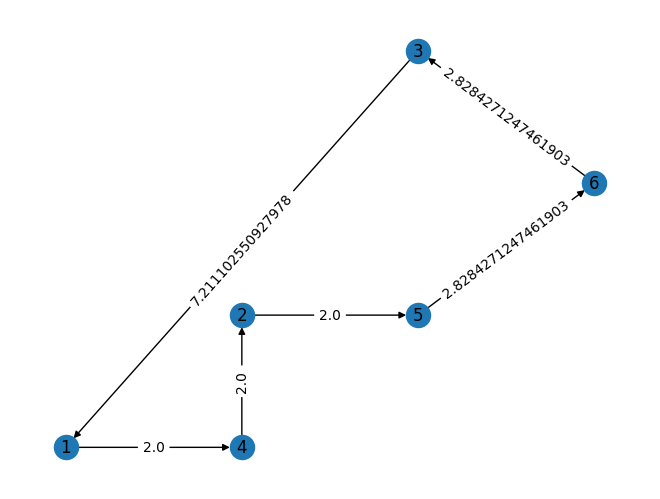

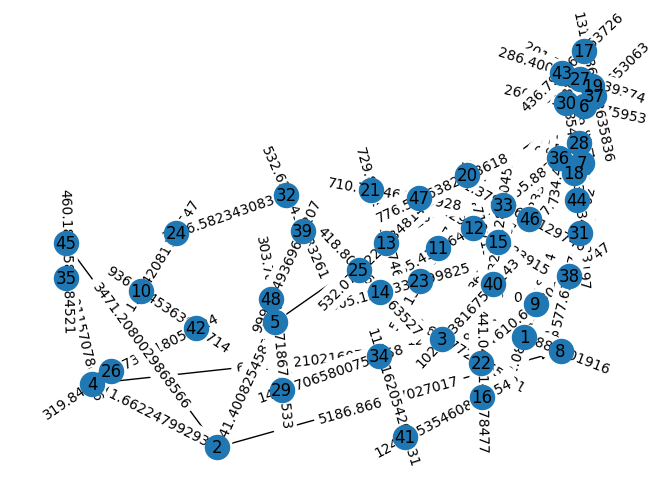

In [32]:
"""

Given certain input, it uses the greedy algorithm to plot a graph and output a file of the solution path
"""

class TSP:

    def __init__(self):
        """ TSP class containing data needed for networkx graph creation, file reading and file writing.
            Creates a graph for the traveling salesperon problem using the greedy algorithm
        """

        self.dimension = None
        self.nodeData = []
        self.graph = nx.DiGraph()
        self.coords = {}
        self.places = []
        self.route = []

    def extractData(self, inputFile=""):
        """
        Iterate through the input file and append each coordinate into the node list.
        Keyword Arguments:
            inputFile {str} -- a string for the file name (default: {""})
        """
        amount_lines = inputFile.splitlines() # I record the lines within the file into a variable.
        self.dimension = int(amount_lines[0].strip()) # I update the self.dimension with the amount of vertices the graph has.
        for i, line in enumerate(amount_lines[1:], start=1): # Here, I run a for loop that maps the coordinates into x and y variables, and puts them into a tuple which then gets appended to self.nodeData.
            x, y = map(int, line.split())
            self.nodeData.append((i, (x, y)))
            self.places.append(i)


    def setUpCoords(self):
        """ Puts the coordinates for each node into a dictionary as a tuple with the node as the key """
        for node, coord in self.nodeData:
          self.coords[node] = coord


    def calculateDistance(self, a, b):
        """calculates & returns the distance between points a and b
        Arguments:
            a {[tuple]} -- tuple of numbers for the x and y coordinate of a node
            b {[tuple]} -- tuple of numbers for the x and y coordinate of a node
        Returns:
            [float] -- the distance between the two points using the distance formula
        """
        x1, y1 = a # deconstructing the tuple here
        x2, y2 = b # deconstructing the tuple for the second coordinate
        return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) # applying the Euclidean distance formula and returning the result

    def getRoute(self, current, visits=[], nVisits=[], needList=True):
        """Makes a list of the nodes to be visited, in order, according to the greedy alogorithm for the TSP
        Arguments:
            current {int} -- the node to start at, not a list index
        Keyword Arguments:
            visits {list} -- list of places already visited (default: {[]})
            nVisits {list} -- list of places not visited (default: {[]})
            needList {bool} -- boolean deciding if the list of places not visited needs to be filled (default: {True})
        """
        if needList:
            nVisits = self.listPlaces()
        visits.append(current)
        nVisits.remove(current)
        if len(nVisits) == 0:
            return visits
        next_node = min(nVisits, key=lambda x: self.calculateDistance(self.coords[current], self.coords[x]))
        return self.getRoute(next_node, visits, nVisits, False)

    def beGreedy(self, start):
        """ puts together the greedy algorithm. Gets the route order and adds the starting place to the end of the route
        Arguments:
            start -- the starting node for the greedy algorithm
        """
        self.route = self.getRoute(start)
        self.route.append(start)  # Return to the starting node

    def listPlaces(self):
        """makes a list of all the nodes/places from the dictionary
        Returns:
            [list] -- list of all the nodes/places
        """
        return list(self.coords.keys())

    def cleanUpList(self, visited, notVisited):
        """removes items in visited from notVisited
        Arguments:
            visited {list}
            notVisited {list}
        Returns:
            [list] -- a list of notVisited - visited
        """

        for item in visited:
            if item in notVisited:
                notVisited.remove(item)
        return notVisited

    def addNodes(self):
        """ adds nodes to the networkx graph
        """

        for everything in self.nodeData:
            node = everything[0]
            self.graph.add_node(node, pos=self.coords[node])

    def addEdges(self):
        """Adds graphs to the networkx graph
        """

        x = 0
        while x < len(self.route)-1:
            self.graph.add_edge(self.route[x], self.route[x+1],
                                weight=self.calculateDistance(self.coords[self.route[x]], self.coords[self.route[x+1]]))
            x += 1

    def showGraph(self):
        """Uses the imported libraries to display the graph
        """
        # get labels and coordinates for the graph
        coords = nx.get_node_attributes(self.graph, 'pos')
        labels = nx.get_edge_attributes(self.graph, 'weight')
        # draw nodes in their coordinates
        nx.draw(self.graph, coords)
        nx.draw_networkx_labels(self.graph, coords)
        # draw edges with their weights
        nx.draw_networkx_edge_labels(self.graph, coords, edge_labels=labels)
        plt.show()




def main():
    tsp = TSP()

    tsp.extractData(tspdata)
    tsp.setUpCoords()
    tsp.addNodes()
    tsp.beGreedy(1)
    tsp.addEdges()
    tsp.showGraph()

    tsp1 = TSP()

    tsp1.extractData(tspdata1)
    tsp1.setUpCoords()
    tsp1.addNodes()
    tsp1.beGreedy(1)
    tsp1.addEdges()
    tsp1.showGraph()


main()